# Exploratory Data Analysis - Bank Customer Attrition

## Objectives

Explore the Bank Customer Attrition dataset to investigate and carry out the following:

* Identify Outliers
* Explore feature engineering
* Descriptive Analysis
* Statistical Analysis

## Inputs

* data/inputs/cleaned_bank_data.csv

## Outputs

* INSERT CSV NAME HERE

___________________

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load cleaned dataset
df = pd.read_csv('../data/inputs/cleaned_bank_data.csv')

# Display first row of DataFrame
df.head(1)

,Unnamed: 0,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,0,1,15598695,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464


_____________________

## Statistical Analysis

Explore the basic statistics from the cleaned datatset.

In [40]:
# Display basic statistics of the DataFrame
categorical_stats = df.describe(include='object')
display(categorical_stats)

,Geography,Gender,CardType
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


**Observations:**

* **Geography** - There are three unique entries within the column, which reveals the dataset based on customers across 3 countries. With the most customers living in France, as French customers make up 5014 of the 10000 entries. 

* **Gender** - The initial exploration reveals there are a greater number of male customers than female customers. The male customer population makes up 5457 of the 10000 entries.

* **Card Type** - There are 4 different card types, with DIAMOND being the most popular among all customers. The DIAMOND card holder population makes up 2507 of the 10000 entries. 

Investigate the mean, median, standard deviation and range of the dataset.

In [41]:
# Perform basic statistical analysis
summary_stats = df.describe()
styled_summary_stats = summary_stats.style.background_gradient(cmap='Blues')
display(styled_summary_stats)

,Unnamed: 0,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,PointEarned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.500000,5000.500000,15690940.569400,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.895680,2886.895680,71936.186123,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,0.000000,1.000000,15565701.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2499.750000,2500.750000,15628528.250000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,4999.500000,5000.500000,15690738.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7499.250000,7500.250000,15753233.750000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,9999.000000,10000.000000,15815690.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


**Analysis Summary**:

This summary is based on the numeric columns relevant to the 3 hypotheses for the project.

**CreditScore:**

* **Mean** = 650.52

* **Median** = 652

* **Standard Deviation** = 96.65. This value suggest there is a great amount of variation between credit scores, which are both significantly above and below the mean credit score. 

* **Range** = 350 - 850. The range reflects the distribution of credit scores within the dataset.


**NumOfProducts:**

* **Mean** = 1.53

* **Median** = 1.00

* **Standard Deviation** = 1.00. This value is low which suggests there isn't much variability within this column (as expected as there are only 4 unique values).

* **Range** = 1 - 4. The range indicates that there are 4 different card types for a customer to hold. 


**PointsEarned:**

* **Mean** = 606.51

* **Median** = 605

* **Standard Deviation** = 225.92. This value is very high which suggest there is significant variability among the amount of points a customer has earned. 

* **Range** = 119 - 1000. This reflects the vast distributions of points earned among the dataset population. 

_________________

## Explore Feature Engineering

Feature engineering will be explored in the notebook to identify the best strategies, to be implemented into the ETL pipeline.

Create a new column to group continuous age values for improved interpretability, enhanced analysis and simplified modelling.

Group age into the following bins:

* 18-29
* 30-39
* 40-49
* 50-59
* 60-69
* 70 +

In [42]:
# Group age into bins
# Define the bins and labels for age groups
bins = [ 18, 30, 40, 50, 60, 70, np.inf]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create a new column 'AgeGroup' in the DataFrame (CoPilot Assitance)
df ['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [43]:
# Display the first few rows of the DataFrame to verify the new column
df.head()

,Unnamed: 0,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned,AgeGroup
0,0,1,15598695,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-49
1,1,2,15649354,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-49
2,2,3,15737556,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-49
3,3,4,15671610,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,30-39
4,4,5,15625092,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,40-49


_______________

## Outlier Handling

The dataset will be investigated for outlier detection and negative values.

In [44]:
# Check for negative values in numeric columns of dataset (CoPilot Assistance)
negative_values = df [df.select_dtypes(include=[np.number]) < 0].any(axis=1)
negative_values = df[negative_values    
]
if negative_values.empty:
    print("No negative values found in the dataset.")
else:
    print("Negative values found in the following rows:")
    print(negative_values)

No negative values found in the dataset.


Check for outliers in dataset among the numeric data types.

In [45]:
# Identify numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(numeric_columns)

Index(['Unnamed: 0', 'RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'SatisfactionScore',
       'PointEarned'],
      dtype='object')


Drop the unnamed column in the DataFrame.

In [46]:
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

Plot all outliers in a Box Plot, only for columns relevant to the hypotheses.

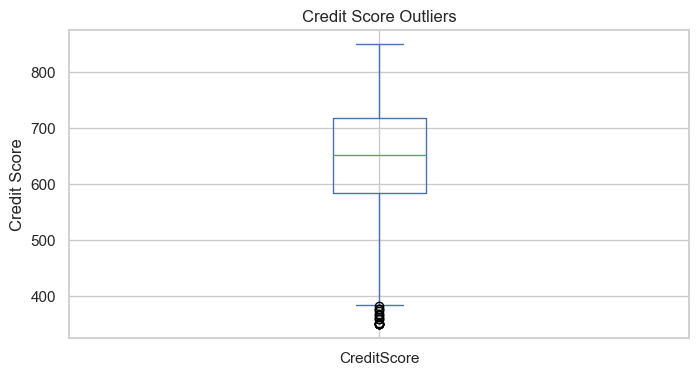

In [ ]:
plt.figure(figsize=(8, 4))
df['CreditScore'].plot(kind='box')
plt.title('Credit Score Outliers')
plt.ylabel('Credit Score')

#save to an external png image file
plt.savefig('../data/outputs/images/boxplot_credit_score_outliers.png', dpi=300)

#show the plot
plt.show()

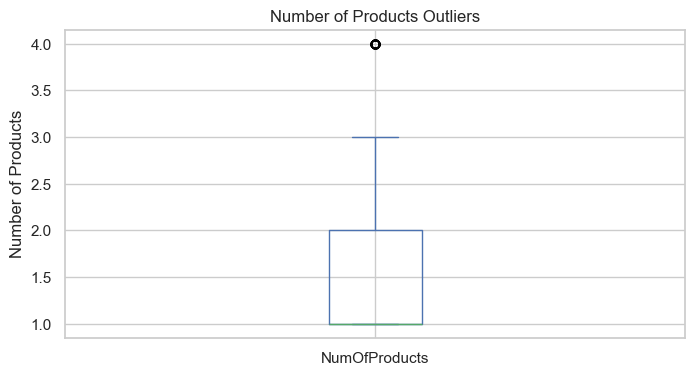

In [ ]:
plt.figure(figsize=(8, 4))
df['NumOfProducts'].plot(kind='box')
plt.title('Number of Products Outliers')
plt.ylabel('Number of Products')

#save to an external png image file
plt.savefig('../data/outputs/images/boxplot_number_of_product_outliers.png', dpi=300)

#show the plot
plt.show()

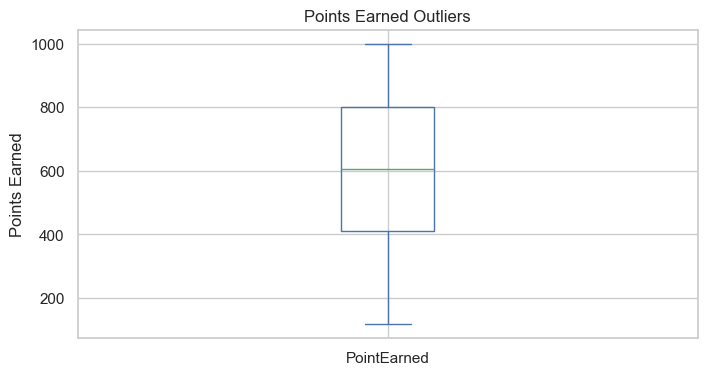

In [ ]:
plt.figure(figsize=(8, 4))
df['PointEarned'].plot(kind='box')
plt.title('Points Earned Outliers')
plt.ylabel('Points Earned')

#save to an external png image file
plt.savefig('../data/outputs/images/boxplot_points_earned_outliers.png', dpi=300)

#show the plot
plt.show()